In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
</style>
"""))

<font size=6>심장병 발병 예측</font>

In [2]:
from tensorflow.keras.models import Sequential #모델 객체 생성시생성시
from tensorflow.keras.layers import Dense, Dropout #layer 생성시
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#1. 데이터 셋 생성
raw_data = pd.read_excel('data/heart-disease.xlsx')
raw_data.describe()

,age,sex,cp,treshtbps,fbs,restecg,thalach,exang,oldpeak,slope,heartDisease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,0.148515,0.983498,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,0.356198,0.994883,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,0.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshtbps     303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  heartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [5]:
raw_data[raw_data['chol']=='?']

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1


In [6]:
raw_data[raw_data['ca']=='?']

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [7]:
raw_data[raw_data['hsl']=='?']

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,1


In [27]:
clean_data = raw_data.replace("?", np.nan)
clean_data.dropna(inplace=True)
clean_data.isna().sum()

age             0
sex             0
cp              0
treshtbps       0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hsl             0
heartDisease    0
dtype: int64

In [13]:
clean_data.columns

Index(['age', 'sex', 'cp', 'treshtbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'hsl', 'heartDisease'],
      dtype='object')

In [18]:
Input = clean_data.iloc[:,:-1]
Target = clean_data.iloc[:,[-1]]

In [20]:
# 심장병 걸린 데이터 비율
Target['heartDisease'].mean()

0.4594594594594595

In [23]:
#scale 조정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Input)
scaled_input = scaler.transform(Input)
scaled_input = pd.DataFrame(scaled_input)
scaled_input

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.942285,0.692820,-2.236793,0.747441,-0.277228,2.425638,1.020526,0.014451,-0.692820,1.074839,2.264087,-0.718421,0.660262
1,1.385714,0.692820,0.876486,1.592523,0.742265,-0.412263,-0.993312,-1.818794,1.443376,0.386756,0.645320,2.487397,-0.890830
2,-1.939999,0.692820,-0.161274,-0.097641,0.049779,-0.412263,-0.993312,1.629453,-0.692820,2.106963,2.264087,-0.718421,-0.890830
3,-1.496571,-1.443376,-1.199033,-0.097641,-0.835064,-0.412263,1.020526,0.974723,-0.692820,0.300746,-0.973448,-0.718421,-0.890830
4,0.166286,0.692820,-1.199033,-0.661029,-0.219521,-0.412263,-0.993312,1.236615,-0.692820,-0.215316,-0.973448,-0.718421,-0.890830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.277143,-1.443376,0.876486,0.465747,-0.123343,-0.412263,-0.993312,-1.164064,1.443376,-0.731379,0.645320,-0.718421,1.177293
292,-1.053142,0.692820,-2.236793,-1.224417,0.319079,-0.412263,-0.993312,-0.771225,-0.692820,0.128725,0.645320,-0.718421,1.177293
293,1.496571,0.692820,0.876486,0.691102,-1.046657,2.425638,-0.993312,-0.378387,-0.692820,2.020953,0.645320,1.418791,1.177293
294,0.277143,0.692820,0.876486,-0.097641,-2.239272,-0.412263,-0.993312,-1.513253,1.443376,0.128725,0.645320,0.350185,1.177293


In [25]:
#7:3 으로 학습 데이터, 테스트 데이터 분류
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_input, Target, test_size=0.3, random_state=5)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((207, 13), (89, 13), (207, 1), (89, 1))

In [34]:
#2. 모델 구성
model = Sequential()
model.add(Dense(units=500, input_dim=13, activation="tanh"))
#과적합을 해결하고자 모호하게 기억
model.add(Dropout(0.1))
model.add(Dense(units=200, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(units=1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               7000      
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [35]:
#3. 모델 학습과정 설정
#accuracy: 예측과 실제가 동일한 건수 / 전체 건수
model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])
#recall: 실제가 참인데 예측도 참인 경우 / 실제 참 전체 건수
#model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=[metrics.Recall()])
#precision: 참으로 예측한 건수 / 실제 참 전체 건수
#model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=[metrics.Precison()])

In [43]:
#4. 힉습시키기
# from tensorflow.keras.callbacks import EarlyStopping
# #early_stopping = EarlyStopping() > 성급한 조기 종료
# early_stopping = EarlyStopping(patience=30) #인자 수만큼 loss가 오를 수 있음
hist = model.fit(X_train, Y_train, epochs=50, batch_size=50, validation_split = 0.2, verbose=1)

Epoch 1/50
4/4 [==============================] - 0s 31ms/step - loss: 0.0282 - accuracy: 0.9697 - val_loss: 0.1373 - val_accuracy: 0.8095
Epoch 2/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0304 - accuracy: 0.9879 - val_loss: 0.1409 - val_accuracy: 0.8095
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0264 - accuracy: 0.9818 - val_loss: 0.1318 - val_accuracy: 0.8571
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0274 - accuracy: 0.9758 - val_loss: 0.1320 - val_accuracy: 0.8333
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0250 - accuracy: 0.9879 - val_loss: 0.1320 - val_accuracy: 0.8333
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0234 - accuracy: 0.9818 - val_loss: 0.1370 - val_accuracy: 0.8333
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0216 - accuracy: 0.9879 - val_loss: 0.1419 - val_accuracy: 0.8333
Epoch 8/50
4/4 [===========

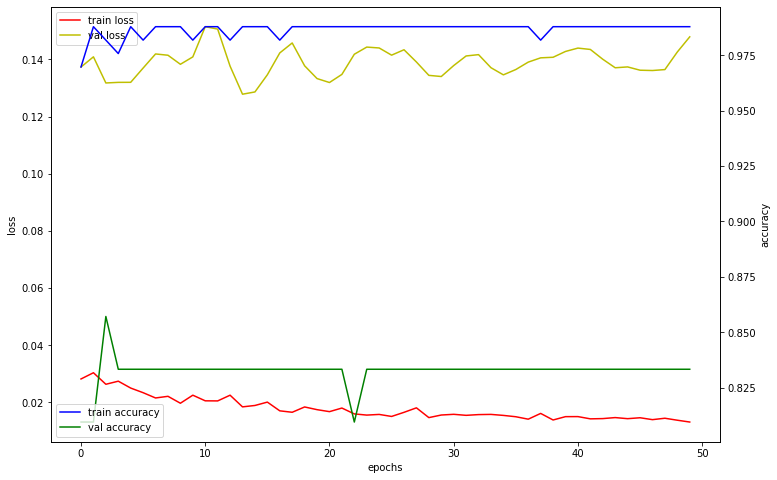

In [44]:
#5. 모델 학습과정을 표시하고 평가
fig, loss_ax = plt.subplots(figsize=(12,8))
loss_ax.plot(hist.history['loss'], 'r', label="train loss")
loss_ax.plot(hist.history['val_loss'], 'y', label="val loss")
loss_ax.set_xlabel("epochs")
loss_ax.set_ylabel("loss")

acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'b', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val accuracy')
acc_ax.set_ylabel("accuracy")

loss_ax.legend(loc=2)
acc_ax.legend(loc=3)

In [45]:
#모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)
#loss and accuracy
loss_and_metrics[0], loss_and_metrics[1]

3/3 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.7865


(0.1714814454317093, 0.7865168452262878)

In [48]:
#6. confusion_matrix(성능평가지표)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
pred = model.predict(X_test)
pred = (pred>0.5)
pred
print(confusion_matrix(Y_test, pred), end='\n')
print('f1_score: ', f1_score(Y_test, pred))

[[36  6]
 [13 34]]
f1_score:  0.7816091954022989
